In [2]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import matplotlib.style as pltstyle
from matplotlib.dates import DateFormatter
from sklearn.metrics import mean_squared_error

In [3]:
kitchen_2019 = pd.read_csv('data/met/SABR_Kitchen_2019.csv')
kitchen_2019.head()

,TIMESTAMP,RECORD,Rain_mm_1_Tot,Rain_mm_2_Tot,Rain_mm_3_Tot,Rain_mm_4_Tot,comment
0,6/27/2019 10:00,0.0,0.0,0.0,0.0,0.0,NaN
1,7/5/2019 11:00,1.0,0.0,0.0,0.0,0.0,NaN
2,7/5/2019 11:30,2.0,0.0,0.0,0.0,0.0,NaN
3,7/5/2019 15:00,3.0,0.0,0.0,0.0,0.0,NaN
4,7/5/2019 15:30,4.0,0.0,0.0,0.0,0.0,NaN


In [4]:
data_types_dict = {'TIMESTAMP':str}
kitchen_2019 = kitchen_2019.astype(data_types_dict)

In [5]:
kitchen_2019['TIMESTAMP'] = pd.to_datetime(kitchen_2019['TIMESTAMP'])

In [6]:
display(kitchen_2019.dtypes)

TIMESTAMP        datetime64[ns]
RECORD                  float64
Rain_mm_1_Tot           float64
Rain_mm_2_Tot           float64
Rain_mm_3_Tot           float64
Rain_mm_4_Tot           float64
comment                  object
dtype: object

In [7]:
kitchen_2019 = kitchen_2019.set_index('TIMESTAMP')

In [8]:
# kitchen_resample = kitchen_2019.Rain_mm_1_Tot.resample('D').sum()
kitchen_resample = kitchen_2019.resample('D').sum()

In [9]:
kitchen_resample

,RECORD,Rain_mm_1_Tot,Rain_mm_2_Tot,Rain_mm_3_Tot,Rain_mm_4_Tot
TIMESTAMP,,,,,
2019-06-27,0.0,0.0,0.0,0.0,0.0
2019-06-28,0.0,0.0,0.0,0.0,0.0
2019-06-29,0.0,0.0,0.0,0.0,0.0
2019-06-30,0.0,0.0,0.0,0.0,0.0
2019-07-01,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-27,402984.0,0.0,0.0,0.0,0.0
2019-12-28,405288.0,23.5,23.2,23.6,22.2
2019-12-29,407592.0,1.1,1.0,1.0,1.0


In [10]:
kitchen_daymet = pd.read_csv('data/met/daymet/kitchen_daymet.csv')

In [11]:
daymet_2019 = kitchen_daymet.loc[kitchen_daymet['year'] == 2019]

In [12]:
daymet_2019 = daymet_2019[177:304]

In [13]:
len(daymet_2019)

127

In [14]:
daymet_2019.tail()

,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa)
14534,2019,300,37070.58,0.00,236.09,0.0,8.48,-1.22,558.77
14535,2019,301,36917.68,2.85,106.58,0.0,5.05,-0.25,599.54
14536,2019,302,36766.13,0.00,248.35,0.0,5.20,-5.18,415.64
14537,2019,303,36615.98,0.53,166.64,0.0,2.06,-4.16,448.92
14538,2019,304,36467.28,0.00,242.56,0.0,4.78,-5.39,409.11


In [15]:
daymet_2019['prcp (mm/day)'].sum()

476.64000000000004

In [16]:
daymet_precip = pd.Series(daymet_2019['prcp (mm/day)']).values

In [17]:
kitchen_precip = kitchen_resample['Rain_mm_1_Tot']
kitchen_precip = kitchen_precip.to_frame()

In [18]:
kitchen_precip = kitchen_precip.iloc[:-61]

In [19]:
len(kitchen_precip)

127

In [20]:
kitchen_precip.insert(loc=0, column='daymet_prcp', value=daymet_precip)

In [21]:
kitchen_precip.head()

,daymet_prcp,Rain_mm_1_Tot
TIMESTAMP,,
2019-06-27,0.0,0.0
2019-06-28,0.0,0.0
2019-06-29,0.0,0.0
2019-06-30,0.0,0.0
2019-07-01,0.0,0.0


In [22]:
kitchen_precip['daymet_prcp'].sum()

476.64000000000004

In [23]:
kitchen_precip['Rain_mm_1_Tot'].sum()

426.3

In [44]:
pprint.pp(pltstyle.available)

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']


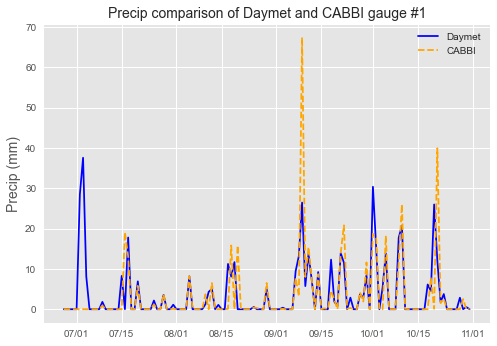

In [46]:
fig, axes = plt.subplots(1,1)
pltstyle.use('seaborn-notebook')
axes.plot(kitchen_precip['daymet_prcp'], label='Daymet', color='blue')
axes.plot(kitchen_precip['Rain_mm_1_Tot'], label='CABBI', color='orange', linestyle='dashed')
axes.legend()
axes.set_ylabel('Precip (mm)', fontsize=14)
date_form = DateFormatter("%m/%d")
axes.xaxis.set_major_formatter(date_form)
axes.set_title('Precip comparison of Daymet and CABBI gauge #1', fontsize=14)
plt.show()

In [47]:
obsv = kitchen_precip['Rain_mm_1_Tot']
pred = kitchen_precip['daymet_prcp']
rmse = mean_squared_error(obsv, pred, squared=False)
rmse

7.455935647385429